In [1]:
import pandas as pd #for manipulating the csv data
import numpy as np #for mathematical calculation

In [2]:
EarlyReg = '1,1,0,0,0,0,1,0,0,1,1,0,0,1'.split(',')
FinishedHW = '1,1,0,1,1,0,0,1,0,0,1,1,0,0'.split(',')
Senior = '0,1,1,1,1,1,0,0,1,0,1,1,0,0'.split(',')
LikesCoffee = '0,0,0,0,0,1,0,1,0,0,0,1,0,1'.split(',')
LikedLastHW = '1,1,0,1,0,1,1,1,1,0,0,1,1,0'.split(',')
A = '1,1,0,0,1,1,0,1,1,0,1,0,0,1'.split(',')

dataset ={'EarlyReg':EarlyReg,'FinishedHW':FinishedHW,'Senior':Senior,'LikesCoffee':LikesCoffee,'LikedLastHW':LikedLastHW,'A':A}
df = pd.DataFrame(dataset,columns=['EarlyReg','FinishedHW','Senior','LikesCoffee','LikedLastHW','A'])

df.to_csv("A.csv")

In [3]:
import numpy as np

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, max_depth=100, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _is_finished(self, depth):
        if (depth >= self.max_depth
            or self.n_class_labels == 1
            or self.n_samples < self.min_samples_split):
            return True
        return False
    
    def _entropy(self, y):
        proportions = np.bincount(y) / len(y)
        entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])
        return entropy

    def _create_split(self, X, thresh):
        left_idx = np.argwhere(X <= thresh).flatten()
        right_idx = np.argwhere(X > thresh).flatten()
        return left_idx, right_idx

    def _information_gain(self, X, y, thresh):
        parent_loss = self._entropy(y)
        left_idx, right_idx = self._create_split(X, thresh)
        n, n_left, n_right = len(y), len(left_idx), len(right_idx)

        if n_left == 0 or n_right == 0: 
            return 0
        
        child_loss = (n_left / n) * self._entropy(y[left_idx]) + (n_right / n) * self._entropy(y[right_idx])
        return parent_loss - child_loss

    def _best_split(self, X, y, features):
        split = {'score':- 1, 'feat': None, 'thresh': None}

        for feat in features:
            X_feat = X[:, feat]
            thresholds = np.unique(X_feat)
            for thresh in thresholds:
                score = self._information_gain(X_feat, y, thresh)

                if score > split['score']:
                    split['score'] = score
                    split['feat'] = feat
                    split['thresh'] = thresh

        return split['feat'], split['thresh']
    
    def _build_tree(self, X, y, depth=0):
        self.n_samples, self.n_features = X.shape
        self.n_class_labels = len(np.unique(y))

        # stopping criteria
        if self._is_finished(depth):
            most_common_Label = np.argmax(np.bincount(y))
            return Node(value=most_common_Label)

        # get best split
        rnd_feats = np.random.choice(self.n_features, self.n_features, replace=False)
        best_feat, best_thresh = self._best_split(X, y, rnd_feats)

        # grow children recursively
        left_idx, right_idx = self._create_split(X[:, best_feat], best_thresh)
        left_child = self._build_tree(X[left_idx, :], y[left_idx], depth + 1)
        right_child = self._build_tree(X[right_idx, :], y[right_idx], depth + 1)
        return Node(best_feat, best_thresh, left_child, right_child)
    
    def _traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def fit(self, X, y):
        self.root = self._build_tree(X, y)

    def predict(self, X):
        predictions = [self._traverse_tree(x, self.root) for x in X]
        return np.array(predictions)




In [4]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
    
# Testing Cardio Dataset
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split

    df = pd.read_csv("cardio_train.csv" , sep= ';')
    # Select the features , here we ignored the id attribute of index 0
    slc = [1,2,3,4,5,6,7,8,9,10,11]
    X = df.values[:, slc]
    # turn the target attribute to np.array
    y= df.iloc[:,-1:].values.flatten()

    # print(X)
    # print(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

    MyModel = DecisionTree(max_depth=5)
    MyModel.fit(X_train, y_train)

    y_pred = MyModel.predict(X_test)
    acc = accuracy(y_test, y_pred)

    print("Accuracy = %", acc*100)

Accuracy = % 72.98285714285714


In [5]:
# Testing Senior Dataset
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split

    df = pd.read_csv("A.csv")
    # Select the features 
    slc = [1,2,3,4,5,6]
    X = df.values[:, slc]
    # turn the target attribute to np.array
    y= df.iloc[:,-1:].values.flatten()

    #print(X)
    # print(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

    MyModel = DecisionTree(max_depth=5)
    MyModel.fit(X_train, y_train)

    y_pred = MyModel.predict(X_test)
    acc = accuracy(y_test, y_pred)

    print("Accuracy = %", acc*100)

Accuracy = % 100.0


## Scikit Model

In [6]:
import pandas as pd
import numpy as np
#convert to a dataframe
df = pd.read_csv("cardio_train.csv" , sep= ';')

# drop the id column
df.drop("id", axis=1, inplace=True)

In [7]:
#extract features and target variables
target_name = df.keys()[-1]
x = df.drop(columns=target_name)

y = df[target_name]

#print(x)
# print(y)

#save the feature name and target variables
feature_names = x.columns
labels = y.unique()

#split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(x,y, test_size = 0.25, random_state = 5)

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =3, random_state = 5)
clf.fit(X_train, y_train)

labelz = str(labels)
labelz= labelz.replace("[","").replace("]","").replace(" ","")
labelz

'01'

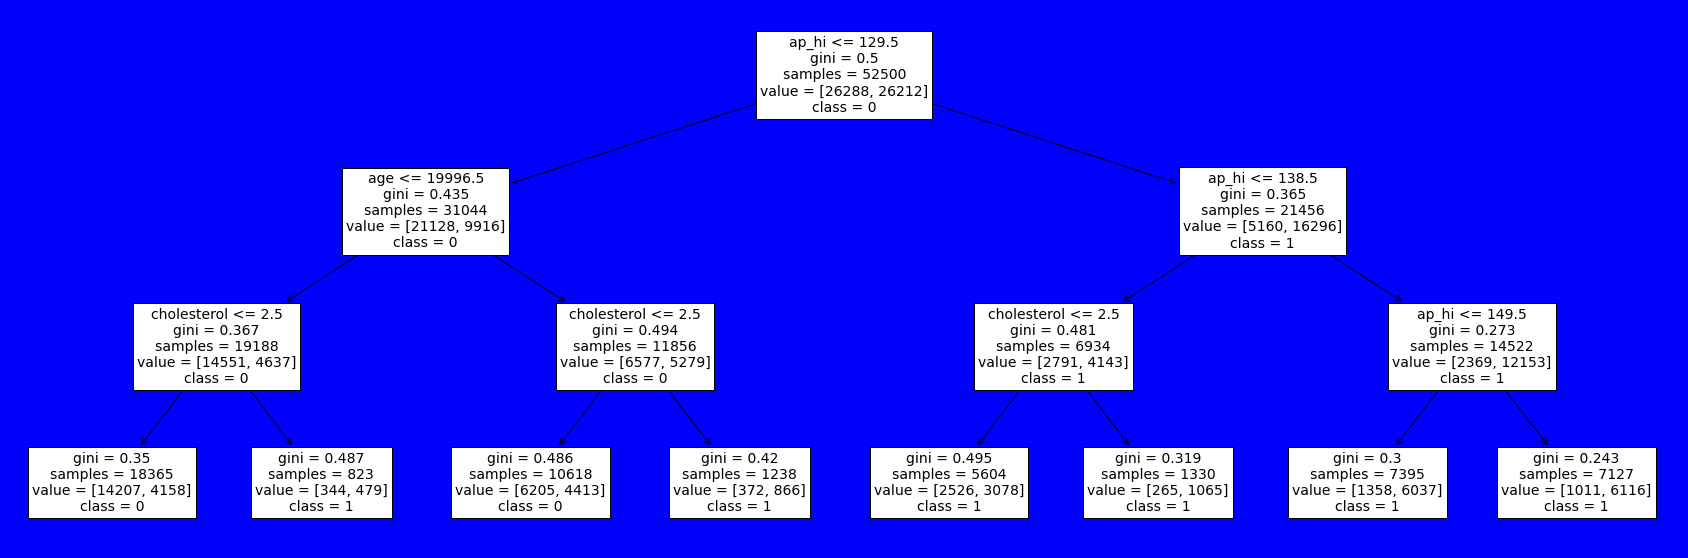

In [15]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='b')
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labelz,
                   rounded = False,
                   filled = False,
                   fontsize=14)
#show the plot
plt.show()

In [16]:
score = clf.score(test_x, test_lab)
print("Accuracy = %", score*100)

Accuracy = % 72.86857142857143
